In [1]:
# Logistic Regression for Binary Classification


# Imports
# pip3 install pandas
# pip3 install scikit-learn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset
diabetes_df = pd.read_csv('../../_datasets/diabetes_clean.csv')

# Display the df
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [2]:
# Locate our Features and the Target

# We can see that diabetes has a max of 1 and a min of 0. This is the Target.
# Side note from looking at EDA, out of our 768 observations it appears that 34.8958% have diabetes.
# I know this because you can read the mean value and see this statistic. Because there are only 2 values
# which range from 0 to 1 only. So the mean of the target will be the precent of positives in dataset.

print(diabetes_df.describe())

       pregnancies     glucose   diastolic     triceps     insulin  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   69.105469   20.536458   79.799479   
std       3.369578   31.972618   19.355807   15.952218  115.244002   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000   62.000000    0.000000    0.000000   
50%       3.000000  117.000000   72.000000   23.000000   30.500000   
75%       6.000000  140.250000   80.000000   32.000000  127.250000   
max      17.000000  199.000000  122.000000   99.000000  846.000000   

              bmi         dpf         age    diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   2

In [3]:
# Proving the note above to be true

# Displays count of each of the values in the dataframe
print(diabetes_df['diabetes'].value_counts())

0    500
1    268
Name: diabetes, dtype: int64


In [4]:
# Now that we have an understanding of the dataset lets continue..
# Target = diabetes
# Features = everything else

# Subsetting the df
X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

# Instantiating model
logreg = LogisticRegression()

# Splitting df for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the model
logreg.fit(X_train, y_train)

# Predict probabilities
# Each shows the probability of observation having diabetes
# predict_prob() returns the probability of class 0 in col 1 and probability of class 1 in col 2. So we splice for class 1 bc thats what I want.
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# print the first 10 observations (remember we are working with an ndarray right now so [:10] all observations down the column 10)
print(y_pred_probs[:10])

# The probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79.

# NOTE Just ignore the warning, its saying that the optimizer did not converge, the data could be noisey -  
# ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

[0.26551021 0.18336638 0.1211966  0.15613521 0.4961118  0.4458219
 0.01359249 0.61646093 0.55640529 0.79311776]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


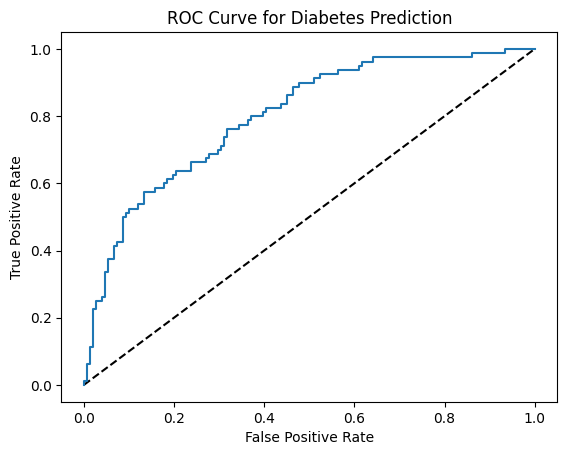

In [5]:
# Plotting the ROC curve to visualize performance using different thresholds

# Import roc_curve and matplotlib 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generating ROC curve values by unpacking: fpr, tpr, thresholds
# fpr: False Positive Rate
# tpr: True Positive Rate (TPR (aka Recall or Sensitivity))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# In matplotlib, k-- is a shorthand notation for specifying the style of a plotted line. 
# Specifically, it means a black dashed line (k stands for black and -- stands for dashed.
# This is plotting for 50/50 randomness, basically we are using the ROC Curve over the randomness scale to see if our model is better than random choice.
plt.plot([0, 1], [0, 1], 'k--')

# Plot fpr against the x-axis and tpr on y-axis
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')

# Display
plt.show()

# The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

In [6]:
# Import roc_auc_score and the matrix and report
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Confusion Matrix and Classification Report need to take the real prediction and not the probability of class placement.
y_pred = logreg.predict(X_test)

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

# AREA UNDER THE ROC CURVE
# A binary classifier that, in fact, just makes random guesses, would be correct approximately 50% of the time, thereby garnering a ROC-AUC score of roughly 0.5.
# In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 
# 0.7 to 0.8 is considered acceptable, 
# 0.8 to 0.9 is considered excellent, and 
# more than 0.9 is considered outstanding.

# We have an AUC score of 0.8002483443708608




0.8002483443708608
[[121  30]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

